In [1]:
import numpy as np
import sys
from scipy.optimize import fsolve

<div class="alert alert-success"><b>Equations du cours</b></div>

Couches de choc minces :
------------------------
$$\frac{\tan(\sigma - \theta)}{\tan(\sigma)} = \frac{\rho_0}{\rho_1} = \frac{\gamma - 1}{\gamma + 1} + \frac{2}{(\gamma + 1)M^{2}_{0}\sin(\sigma)^2}$$

Relations isentropiques:
------------------------

$$\frac{T}{T_i} = \left(1 + \frac{\gamma-1}{2} M^2\right)^{-1}$$

$$\frac{p}{p_i} = \left(1 + \frac{\gamma-1}{2} M^2\right)^{-\frac{\gamma}{\gamma - 1}}$$

$$\frac{\rho}{\rho_i} = \left(1 + \frac{\gamma-1}{2} M^2\right)^{-\frac{1}{\gamma - 1}}$$

In [2]:
def Get_sigma_rho(M0, rho0, rho1, gamma):
    return np.arcsin(((gamma + 1) * M0**2 *(rho0/rho1 - (gamma - 1)/(gamma + 1))/2)**(-1/2))

M0 = 2
rho0 = 1.225
rho1 = 2.36
gamma = 1.4

sigma = Get_sigma_rho(M0, rho0, rho1, gamma)
print(f"sigma = {sigma} radians")

sigma = 0.8770936520997603 radians


In [3]:
# Define the constants
M0 = 2
rho0 = 1.225
rho1 = 2.36
gamma = 1.4

# Define the equation to solve for sigma
def equation(sigma):
    return (rho0 / rho1) - ((gamma - 1) / (gamma + 1) + (2 / ((gamma + 1) * M0**2 * np.sin(sigma)**2)))

# Initial guess for sigma
sigma_guess = np.radians(30)  # Starting with a guess of 30 degrees

# Solve for sigma
sigma_solution = fsolve(equation, sigma_guess)[0]

# Convert the solution from radians to degrees
print(f"sigma = {sigma_solution} radians")


sigma = 0.8770936520997449 radians


In [4]:
from scipy.optimize import fsolve
import numpy as np

# Define the constants
M0 = 10
rho0 = 1.225
rho1 = 2.36
gamma = 1.4

# Define the equation to solve for sigma
def equation(sigma):
    return (rho0 / rho1) - ((gamma - 1) / (gamma + 1) + (2 / ((gamma + 1) * M0**2 * np.sin(sigma)**2)))

# Try a range of initial guesses for sigma
sigma_guesses = np.radians(np.linspace(1, 360, 10))  # Testing values between 1 and 89 degrees

# Solve for sigma
sigma_solutions = [fsolve(equation, guess)[0] for guess in sigma_guesses]

print(f"sigma = {sigma_solutions} radians")

sigma = [0.15438937771740247, -2.9872032758723908, -122.36772411228455, 40.686315118949906, 3.295982031307196, 3.295982031307138, -15.553573890231558, 226.3490604361824, 12.411981236641777, 6.283185400806343] radians


Text(0.5, 1.0, 'Super géométrie qui est rapide')

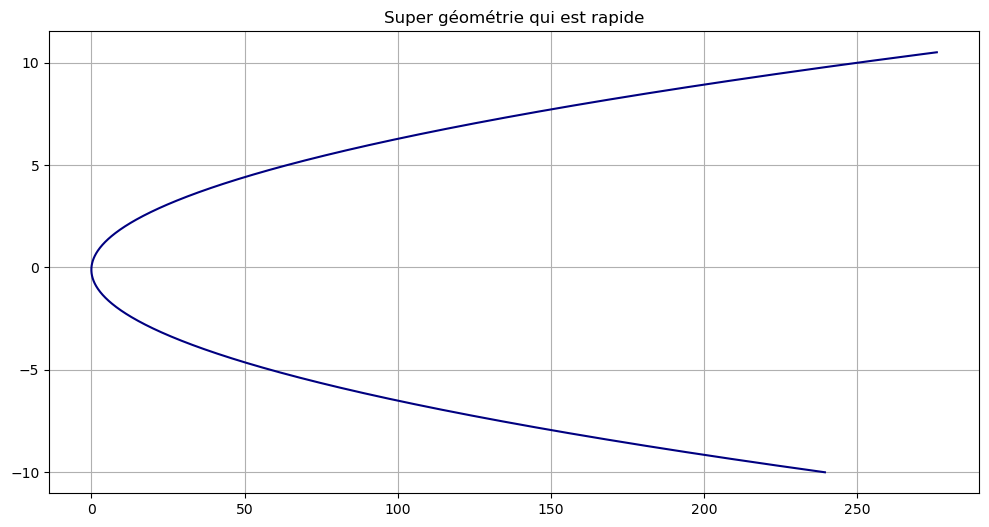

In [5]:
import matplotlib.pyplot as plt
x = np.linspace(-10, 10.5, 1000)

y = 2.45 * x**2 + 0.557 * x

fig, ax = plt.subplots(1, figsize=(12, 6))
ax.plot(y, x, c='navy')
ax.grid("on")
ax.set_title("Super géométrie qui est rapide")

In [6]:
## CONSTANTES

Tz = -6.5 * 1e-3 # K/m
g = 9.80665 # m/s^2
P_0 = 101325 # Pa
rho_0 = 1.225 # km/m^3
T_0 = 288.15 # K
R = 8.314 #
M = 28.966 * 1e-3 #
r = R/M
mu_0 = 1.458*1e-6
gamma = 1.4

In [7]:
## FONCTION EN LIEN AVEC LES CONDITIONS INITIALES

def T_z(z, Tz, T_0):
    """
        Température en fonction de l'altitude
            $$T(z) = T_0 + T_z \times z$$

        Params:
        -------
            - z   : altitude
            - T_z : -6.5 * 1e-3
            - T_0 : 288.15 K

        Return:
        -------
            T(z)
    """
    return T_0 + Tz * z

def P_z(z, P_0, T_0, Tz, g, r):
    """
        Pression en fonction de l'altitude
            $$P(z) = P_0 * \left(1 + \frac{T_z}{T_0} z \right)^{\frac{-g}{z T_z}}$$

        Params:
        -------
            - z     : altitude
            - P_0   : pression au niveau du sol
            - T_0   : température au niveau du sol
            - T_z   : -6.5 * 1e-3
            - g     : 9.80655
            - r     : R/M = 287.0.261686114755

        Return:
        -------
            P(z)
    """
    return P_0 * (1 + (Tz/T_0) * z) ** (-g/(r * Tz))

def SutherlandsLaw(mu_0, T):
    """ 
        Loi de Sutherland
            $$mu(T) = 1.458*1e-6 * T**(3/2) / (110.4 + T)$$

        Params:
        -------
            - mu_0  : 1.458*1e-6
            - T     : température à l'altitude z

        Return:
        -------
            mu(T)
    """
    return mu_0 * (T**(3/2)) / (110.4 + T)

## FONCTION EN LIEN AVEC LA PRESSION

def PressureCoeff(p, p_inf, rho_inf, v_inf):
    """
        Coefficient de pression :
            $$C_P = \frac{p - p_{\infty}}{\frac{1}{2}\rho_{\infty}V_{\infty}^2}$$

        Params:
        -------
            - p         : pression
            - p_inf     : pression de référence
            - rho_inf   : masse volumique de référence
            - v_inf     : vitesse de l'écoulement

        Return:
        -------
            C_P
    """
    P_dyn = 0.5 * rho_inf * v_inf **2
    return (p - p_inf) / P_dyn

def SimplifiedNewtonian(theta):
    """
        Simplified Newtonian approximation of pressure coeff
            $$C_{p_i} = 2 \sin(\theta_i)^2$$

        Params:
        -------
            - theta : angle

        Return:
        -------
            - Cp_i
    """
    return 2 * np.sin(theta)**2

def ModifiedNewtonian(theta, Cp_max):
    """
        Modified Newtonian approximation of pressure coeff
            $$C_{p_i} = C_p^{max} \sin(\theta)^2$$

        Params:
        -------
            - theta  : angle
            - Cp_max : pressure coeff max
    """
    return Cp_max * np.sin(theta)**2

## RELATIONS ISENTROPIQUES

def IsentropicFactor(state, Mach, gamma):

    if state == "temperature":
        exp = -1
    elif state == "pressure":
        exp = - gamma / (gamma - 1)
    elif state == "density":
        exp = - 1 / (gamma - 1)
    else:
        print('Incorrect state !')
        sys.exit("End.")

    return (1 + ((gamma - 1)/2) * Mach **2) ** exp

def sound_speed(gamma, r, T):
    
    return np.sqrt(gamma * r * T)

In [8]:
## Simulation

v_inf = 1548 # m/s
gamma = 1.4 
z = 10000
T = T_z(z=z, Tz=Tz, T_0=T_0)
P = P_z(z=z, P_0=P_0, T_0=T_0, Tz=Tz, g=g, r=r)
a = sound_speed(gamma=gamma, r=r, T=T)
M_inf = v_inf / a

print(f"Constant at z = {z} m:\n    Pressure : {P:.5f} Pascal\n    Temperature : {T:.5f} K\n")

print(f"sound speed at z = {z} m : {a:.2f} m/s")
print(f"Mach at z = {z} m : {M_inf}")

P0_P = IsentropicFactor(state="pressure", Mach=M_inf, gamma=gamma)
T0_T = IsentropicFactor(state="temperature", Mach=M_inf, gamma=gamma)
Press = P0_P ** (-1)
Temp = T0_T ** (-1)
print(f"\nIsentropic Value at z = {z}km\n    Pressure : {Press:.5f} Pascal\n     Temperature : {Temp:.5f} K")

Constant at z = 10000 m:
    Pressure : 26432.93849 Pascal
    Temperature : 223.15000 K

sound speed at z = 10000 m : 299.45 m/s
Mach at z = 10000 m : 5.169490552953422

Isentropic Value at z = 10000km
    Pressure : 643.34684 Pascal
     Temperature : 6.34473 K
